<a href="https://colab.research.google.com/github/fellowship/platform-demos3/blob/master/InriaAerialImages/Inria_aerial_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we are going to do classification using the same dataset which used in platform.ai to label aerial images into building present or building absent. 

Get data: Mount the google drive to access the data. And import required libraries.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import fastai
from fastai.vision import *
import torch
import torchvision.transforms.functional as F

import tarfile, os,pathlib

train_demo.tar is having 1000 images which is labeled as building present or building absent

In [0]:
!cp '/content/drive/My Drive/train_demo.tar' '/content'

In [0]:
!tar -zxvf '/content/train_demo.tar'

In [6]:
len(get_image_files('/content/content/platform_demo/train/present')),len(get_image_files('/content/content/platform_demo/train/absent'))

(504, 496)

Define the data for training the model using fastai library

In [0]:
path = Path('/content/content/platform_demo/train')
src = (ImageList.from_folder(path) #define source of input
      .split_by_rand_pct(0.2)
      .label_from_folder())
data = (src.transform(get_transforms(), size=250)
       .databunch(bs=32))#batch size=16

In [8]:
data

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250)
y: CategoryList
present,present,present,present,present
Path: /content/content/platform_demo/train;

Valid: LabelList (200 items)
x: ImageList
Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250)
y: CategoryList
absent,present,absent,present,absent
Path: /content/content/platform_demo/train;

Test: None

In [9]:
data.classes 

['absent', 'present']

CNN Learner

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 74365414.86it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-03


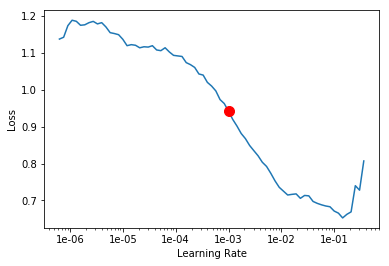

In [11]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [12]:
lr = 1e-03
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.748116,0.352045,0.875000,00:07
1,0.485618,0.233276,0.920000,00:07
2,0.385181,0.208264,0.925000,00:07
3,0.319144,0.199049,0.920000,00:07
4,0.282751,0.196199,0.940000,00:07
5,0.248204,0.179122,0.940000,00:07
6,0.215102,0.167945,0.950000,00:07
7,0.213130,0.165178,0.950000,00:07
8,0.208283,0.160554,0.950000,00:07
9,0.196872,0.168520,0.940000,00:07


Save the stage-1 model into drive for the future use

In [0]:
learn.save('inria_250_resnet34_stg1_clss')
!cp '/content/content/platform_demo/train/models/inria_250_resnet34_stg1_clss.pth' 'drive/My Drive/fellowship/Classification/resnet34_250'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


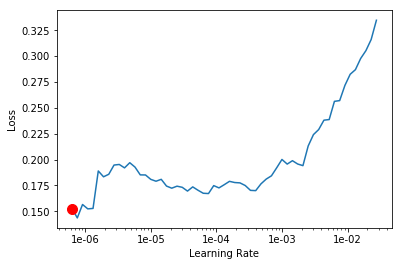

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [15]:
lr = 5e-05
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.158358,0.158279,0.945000,00:07
1,0.188500,0.166957,0.945000,00:08
2,0.191432,0.158260,0.945000,00:08
3,0.176820,0.159323,0.950000,00:08
4,0.172413,0.154136,0.960000,00:08
5,0.155263,0.149175,0.950000,00:08
6,0.158611,0.154385,0.945000,00:08
7,0.140125,0.151006,0.945000,00:08
8,0.142334,0.150999,0.950000,00:08
9,0.140670,0.150870,0.950000,00:08


Save the stage-2 model into drive for the future use

In [0]:
learn.save('inria_250_resnet34_stg2_clss')
!cp '/content/content/platform_demo/train/models/inria_250_resnet34_stg2_clss.pth' 'drive/My Drive/fellowship/Classification/resnet34_250'

In [0]:
learn.export()
!cp '/content/content/platform_demo/train/export.pkl' 'drive/My Drive/fellowship/Classification/resnet34_250'

In [0]:
learn.load('inria_250_resnet34_stg2_clss')

Plotting the losses

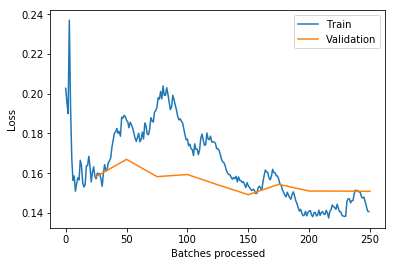

In [19]:
learn.recorder.plot_losses()

Confusion Matrix

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

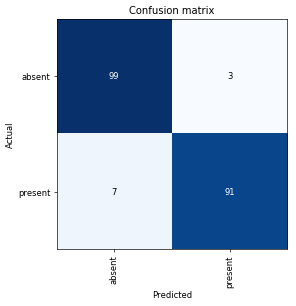

In [21]:
interp.plot_confusion_matrix(figsize=(5, 5), dpi=60)